### Calulate ssh spectra at every grid point (Spatial structure of peaks)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from netCDF4 import Dataset
from xmitgcm import open_mdsdataset
import time

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/02_noSVB_barotropic/'

ds = open_mdsdataset(outdir, prefix=['eta'])
ds2 = open_mdsdataset(outdir2, prefix=['eta'])

In [3]:
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)

# depth with bay
depth = ds['Depth'][:]

In [4]:
filename = 'ssh_spectra_3peaks_barotropic_cm.nc'
sshData = xr.open_dataset(filename)

In [5]:
sshData

<xarray.Dataset>
Dimensions:  (lat: 612, lon: 512)
Coordinates:
  * lon      (lon) float64 -122.0 -122.0 -122.0 -121.9 ... -114.1 -114.0 -114.0
  * lat      (lat) float64 27.01 27.02 27.03 27.05 ... 35.28 35.29 35.3 35.32
Data variables:
    p1_psd   (lat, lon) float64 ...
    p2_psd   (lat, lon) float64 ...
    p3_psd   (lat, lon) float64 ...
    p1_freq  (lat, lon) float64 ...
    p2_freq  (lat, lon) float64 ...
    p3_freq  (lat, lon) float64 ...
Attributes:
    title:        SSH max PSD and frequency of main peaks SVB-no SVB for baro...
    author:       Karina Ramos Musalem
    institution:  ICACC-UNAM
    source:       /notebooks/MITgcm/domain5/ssh_spectra_domain.py
    description:  This file conains the PSD and frequency of the 3 peaks in S...
    timeStamp:    Wed Dec  8 20:16:25 2021

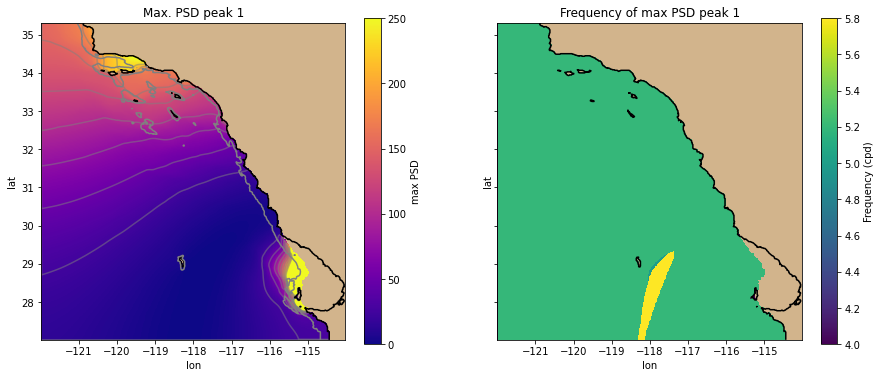

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p1_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,250,25)
cn1 = ax1.contour(lon,lat, sshData.p1_psd, levels, colors='0.5', alpha=0.5)
ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 1')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p1_freq, cmap='viridis')
plt.colorbar(pc2, ax=ax2, label='Frequency (cpd)')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Frequency of max PSD peak 1')
ax2.set_aspect(1)


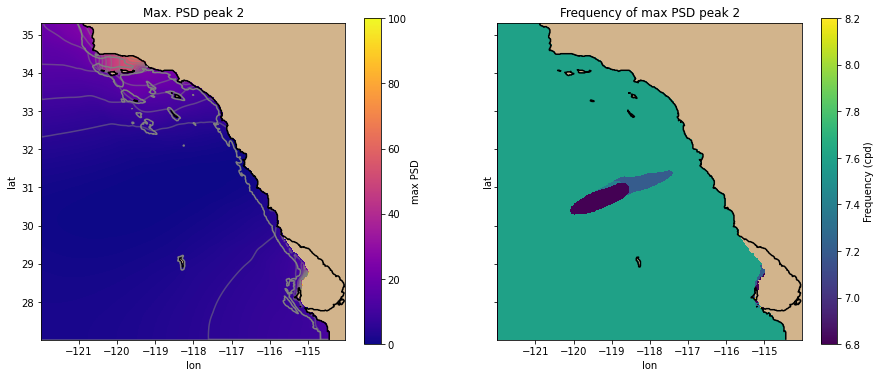

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p2_psd, cmap='plasma', vmin=0, vmax=100)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,100,5)
cn1 = ax1.contour(lon,lat, sshData.p2_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 2')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p2_freq, cmap='viridis')
plt.colorbar(pc2, ax=ax2, label='Frequency (cpd)')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Frequency of max PSD peak 2')
ax2.set_aspect(1)


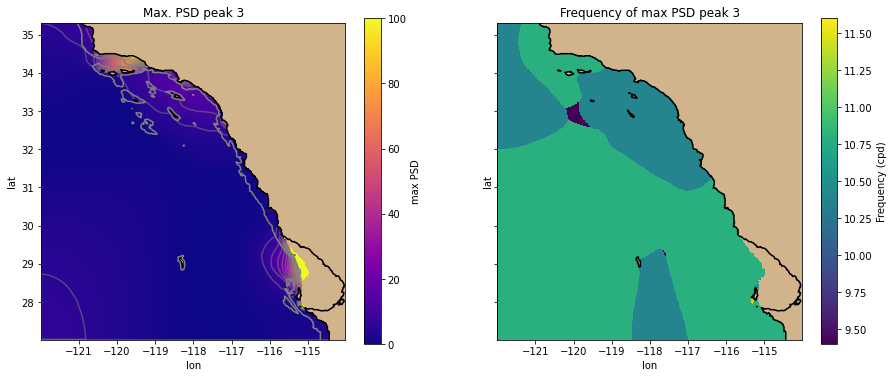

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p3_psd, cmap='plasma', vmin=0, vmax=100)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,100,5)
cn1 = ax1.contour(lon,lat, sshData.p3_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 3')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p3_freq, cmap='viridis')
plt.colorbar(pc2, ax=ax2, label='Frequency (cpd)')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Frequency of max PSD peak 3')
ax2.set_aspect(1)


In [23]:
print('%1.3e' %sshData.p1_psd[529,176])

2.112e+02


In [24]:
print('%1.3e' %sshData.p2_psd[529,176])

4.184e+01


In [25]:
print('%1.3e' %sshData.p3_psd[529,176])

3.649e+01


In [26]:
print('%1.1e' %np.max(sshData.p3_psd))

4.8e+02


In [27]:
612-50

562

211.21321053572035
5.2
41.84005456309765
7.6
36.49475961761578
10.8
211.21321053572035
5.2
41.84005456309765
7.6
36.49475961761578
10.8
212.33208301830257
5.2
42.502638111398404
7.6
38.80627343764196
10.8
218.70563165236464
5.2
45.484891373372804
7.6
45.61475417760989
10.8
225.88120719624027
5.2
48.86562246821005
7.6
53.64619540075192
10.8


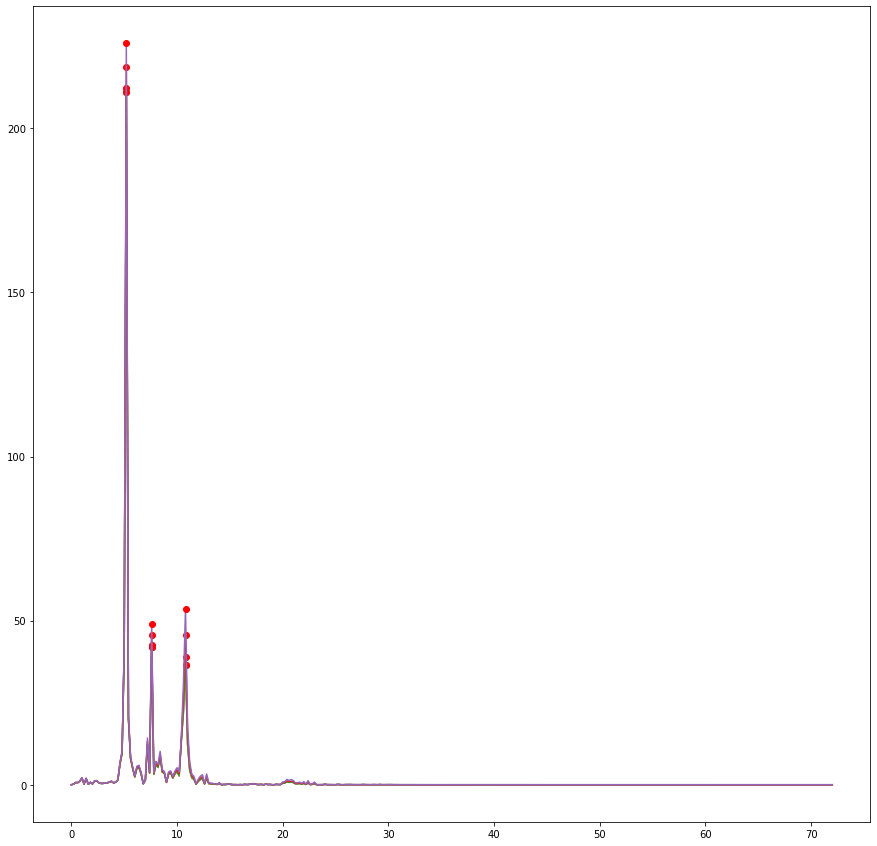

In [28]:
fig, (ax1) = plt.subplots(1,1,figsize=(15,15), sharey=True)


samp_freq = 1/600 # 10 min data
  
lons = [176,176,175]
lats = [529,530,531]

for ii in lons: #nx
    if ii%10 == 0:
        print(ii)
    for jj in lats: #ny
        if mask[0,jj,ii]== True:
            continue
        else:
            freq, psd = signal.periodogram((ds.ETAN[:,jj,ii]-ds2.ETAN[:,jj,ii])*100, samp_freq, detrend='constant')
        
        print(np.max(psd[20:30])) # find max PSD for peak 1 (these limits shouldn't be hard coded!)
        print(freq[np.argmax(psd[20:30])+20]*86400) # find corresponding frequency
        
        print(np.max(psd[34:45])) # find max PSD for peak 2
        print(freq[np.argmax(psd[34:45])+34]*86400)
        
        print(np.max(psd[47:59])) # find max PSD for peak 3
        print(freq[np.argmax(psd[47:59])+47]*86400)

        ax1.plot(freq*86400,psd)
        ax1.plot(freq[np.argmax(psd[20:30])+20]*86400,np.max(psd[20:30]),'ro')
        ax1.plot(freq[np.argmax(psd[34:45])+34]*86400,np.max(psd[34:45]),'ro')
        ax1.plot(freq[np.argmax(psd[47:59])+47]*86400,np.max(psd[47:59]),'ro')

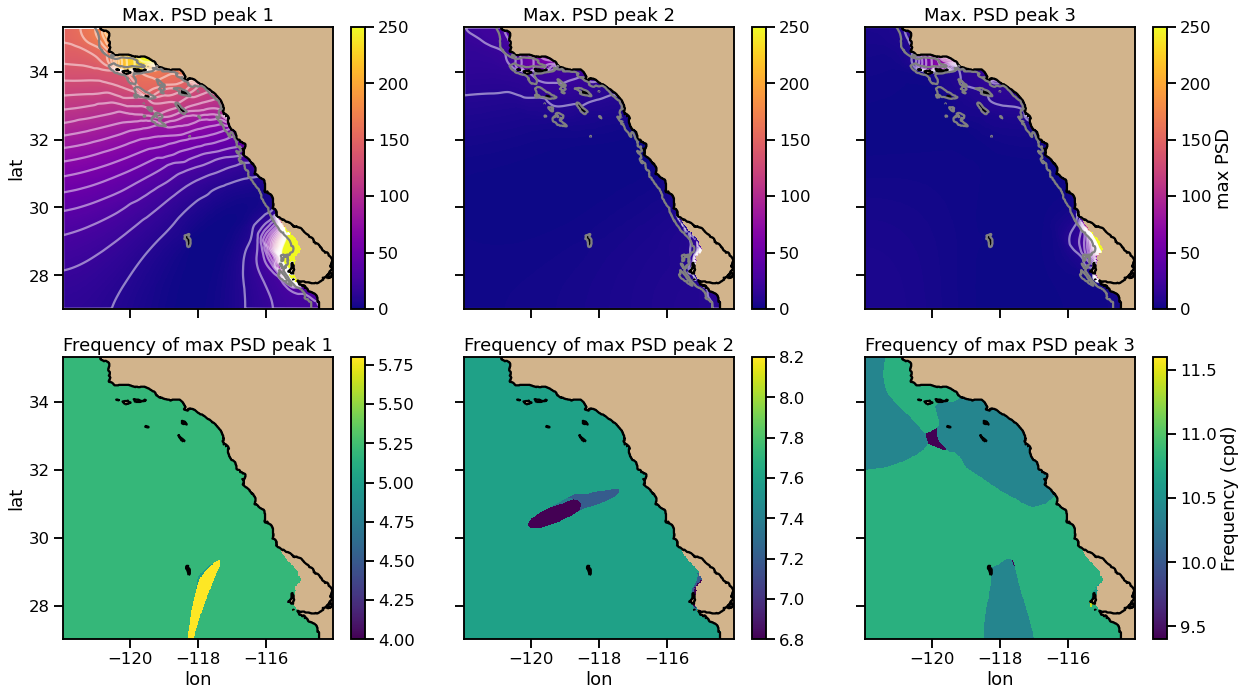

In [49]:
fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,10), sharey=True, sharex=True)
sns.set_context('talk')
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p1_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1)
levels=np.arange(0,250,10)
cn1 = ax1.contour(lon,lat, sshData.p1_psd, levels, colors='1', alpha=0.5)
ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 1')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon,lat, sshData.p2_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax2)
levels=np.arange(0,250,10)
cn2 = ax2.contour(lon,lat, sshData.p2_psd, levels, colors='1', alpha=0.5)
ax2.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax2.set_title('Max. PSD peak 2')
ax2.set_aspect(1)

ax3.set_facecolor('tan')
pc3 = ax3.pcolormesh(lon,lat, sshData.p3_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax3, label='max PSD')
levels=np.arange(0,250,10)
cn3 = ax3.contour(lon,lat, sshData.p3_psd, levels, colors='1', alpha=0.5)
ax3.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax3.set_title('Max. PSD peak 3')
ax3.set_aspect(1)

ax4.set_facecolor('tan')
pc4 = ax4.pcolormesh(lon, lat, sshData.p1_freq, cmap='viridis')
plt.colorbar(pc4, ax=ax4)
ax4.contour(lon,lat,depth,levels=[0], colors=['k'])
ax4.set_xlabel('lon')
ax4.set_ylabel('lat')
ax4.set_title('Frequency of max PSD peak 1')
ax4.set_aspect(1)

ax5.set_facecolor('tan')
pc5 = ax5.pcolormesh(lon, lat, sshData.p2_freq, cmap='viridis')
plt.colorbar(pc5, ax=ax5)
ax5.contour(lon,lat,depth,levels=[0], colors=['k'])
ax5.set_xlabel('lon')
ax5.set_title('Frequency of max PSD peak 2')
ax5.set_aspect(1)

ax6.set_facecolor('tan')
pc6 = ax6.pcolormesh(lon, lat, sshData.p3_freq, cmap='viridis')
plt.colorbar(pc6, ax=ax6, label='Frequency (cpd)')
ax6.contour(lon,lat,depth,levels=[0], colors=['k'])
ax6.set_xlabel('lon')
ax6.set_title('Frequency of max PSD peak 3')
ax6.set_aspect(1)
plt.tight_layout()

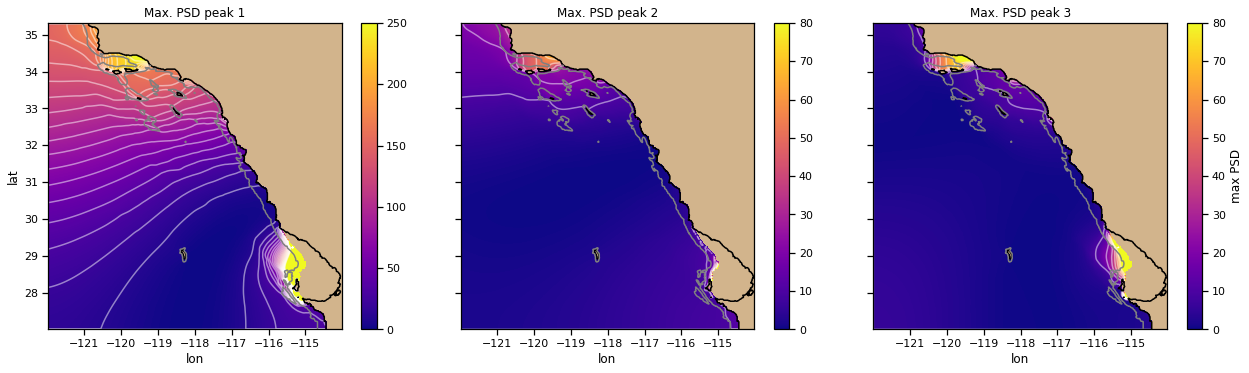

In [56]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(18,5), sharey=True, sharex=True)
sns.set_context('notebook')
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData.p1_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1)
levels=np.arange(0,250,10)
cn1 = ax1.contour(lon,lat, sshData.p1_psd, levels, colors='1', alpha=0.5)
ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_ylabel('lat')
ax1.set_xlabel('lon')
ax1.set_title('Max. PSD peak 1')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon,lat, sshData.p2_psd, cmap='plasma', vmin=0, vmax=80)
plt.colorbar(pc2, ax=ax2)
levels=np.arange(0,80,10)
cn2 = ax2.contour(lon,lat, sshData.p2_psd, levels, colors='1', alpha=0.5)
ax2.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax2.set_title('Max. PSD peak 2')
ax2.set_aspect(1)
ax2.set_xlabel('lon')

ax3.set_facecolor('tan')
pc3 = ax3.pcolormesh(lon,lat, sshData.p3_psd, cmap='plasma', vmin=0, vmax=80)
plt.colorbar(pc3, ax=ax3, label='max PSD')
levels=np.arange(0,80,10)
cn3 = ax3.contour(lon,lat, sshData.p3_psd, levels, colors='1', alpha=0.5)
ax3.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax3.set_title('Max. PSD peak 3')
ax3.set_aspect(1)
ax3.set_xlabel('lon')
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()
